# E1: Análisis no Supervisado para segmentación de clientes

**Limpieza de datos**

In [54]:
#importo librerías y frameworks

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
import seaborn as sns
from  sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA





In [55]:
# Cargar y previsualizar dataset

df = pd.read_csv('dataset.csv')
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [56]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [57]:
# Calculo porcentaje de nulos por columna

print("Channel % nulos:", df['Channel'].isna().sum() * 100 / len(df['Channel']))
print("Region % nulos: ", df['Region'].isna().sum() * 100 / len(df['Region']))

print("Fresh % nulos:", df['Fresh'].isna().sum() * 100 / len(df['Milk']))
print("Milk % nulos: ", df['Milk'].isna().sum() * 100 / len(df['Milk']))


print("Grocery % nulos:", df['Grocery'].isna().sum() * 100 / len(df['Grocery']))
print("Frozen % nulos: ", df['Frozen'].isna().sum() * 100 / len(df['Frozen']))


print("Detegent Paper % nulos:", df['Detergents_Paper'].isna().sum() * 100 / len(df['Detergents_Paper']))
print("Delicassen % nulos: ", df['Delicassen'].isna().sum() * 100 / len(df['Delicassen']))

Channel % nulos: 0.0
Region % nulos:  0.0
Fresh % nulos: 0.0
Milk % nulos:  0.0
Grocery % nulos: 0.0
Frozen % nulos:  0.0
Detegent Paper % nulos: 0.0
Delicassen % nulos:  0.0


No existen columnas con valores nulos, no requiere ese preprocesado


Comprobamos que valores sean consistentes y dentro de rango

In [58]:
#vemos que valores sean coherentes y dentro de rango

df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


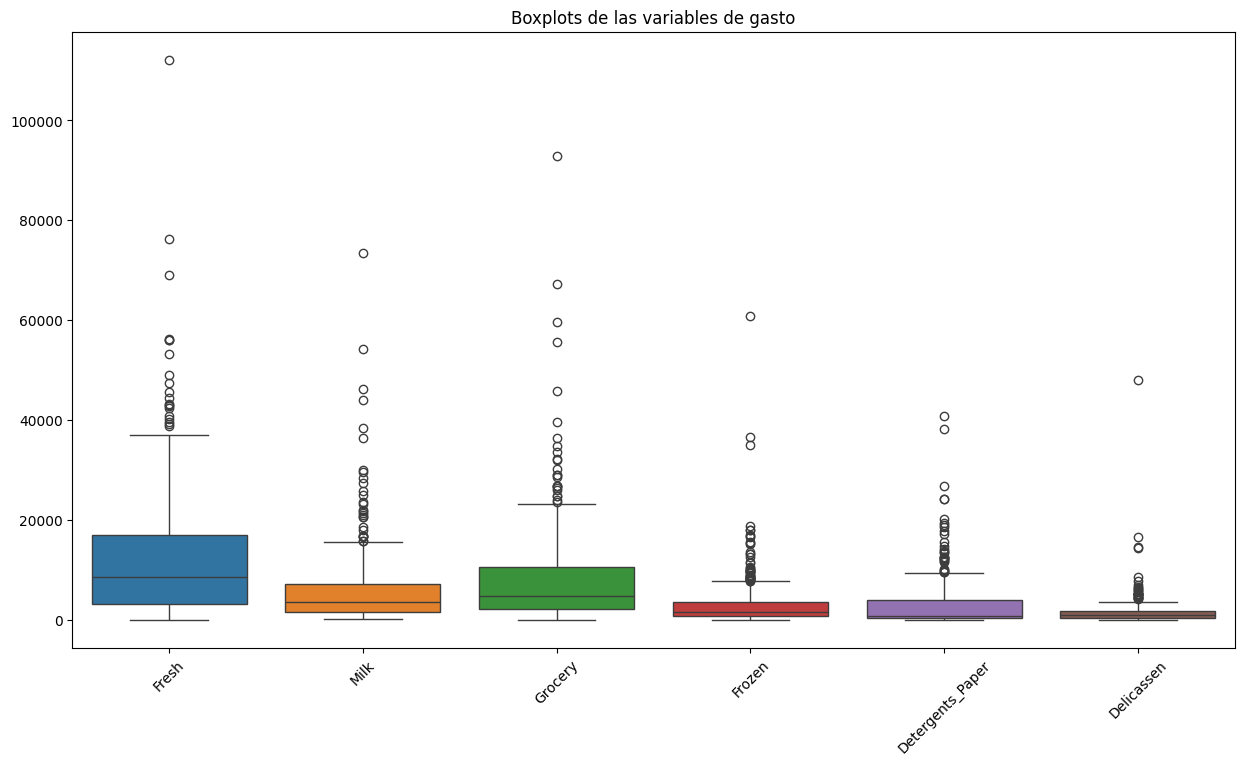

In [59]:
variables_numericas = df.drop(columns=["Channel", "Region"])

plt.figure(figsize=(15, 8))
sns.boxplot(data=variables_numericas)
plt.xticks(rotation=45)
plt.title("Boxplots de las variables de gasto")
plt.show()


**2. Escalado de variables numéricas**

In [60]:
variables_numericas = df.drop(columns=['Region','Channel'])

#inicializar standardScaler
scaler = StandardScaler()

#Ajustar y transformar
scaler = scaler.fit_transform(variables_numericas)

#convertir a df
scaled_data = pd.DataFrame(scaler, columns=variables_numericas.columns)

#mostrar nuevo dataset
scaled_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


**3. Implementación algoritmo KMeans**

In [61]:
max_k = 10

inertias = []
silhouettes = []
K = range(2,max_k)

for i in K:
    kmeans = KMeans(n_clusters=i, random_state= 42, n_init=10)
    labels = kmeans.fit_predict(scaled_data)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(scaled_data,labels))   

print("Inercias: " ,inertias)
print("Coeficientes silhouette:", silhouettes)

Inercias:  [1956.124277522268, 1608.4311488289443, 1317.8383605390707, 1058.7712532570085, 915.7412597498404, 825.400252021833, 737.386203336268, 661.4495846389702]
Coeficientes silhouette: [0.5472146913441881, 0.5482872649700601, 0.34847138657014315, 0.3690403826812808, 0.3782288965882046, 0.3342819788182625, 0.3201161896109077, 0.30902833452574485]


Ploteamos método del codo 

Text(0.5, 1.0, 'Método del codo')

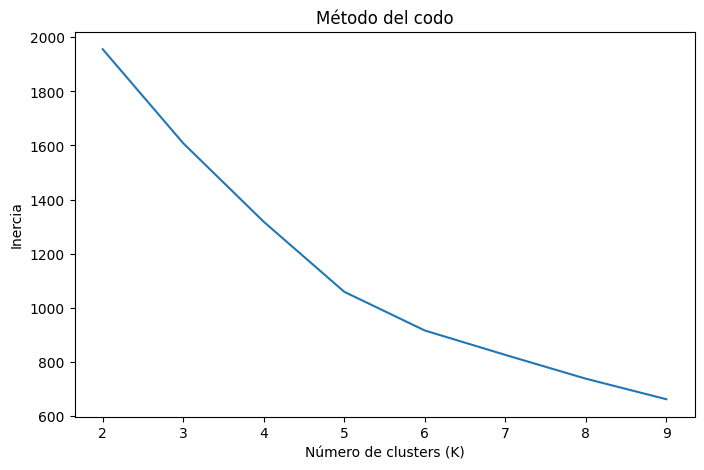

In [62]:
plt.figure(figsize=(8,5))
plt.plot(K,inertias)
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del codo")

In [63]:
K_optimo = 6
kmeans_final = KMeans(n_clusters=K_optimo,random_state=42,n_init=10)
df['Cluster'] = kmeans_final.fit_predict(scaled_data)

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


**3. Visualización de los Resultados**

Text(0, 0.5, 'PC2')

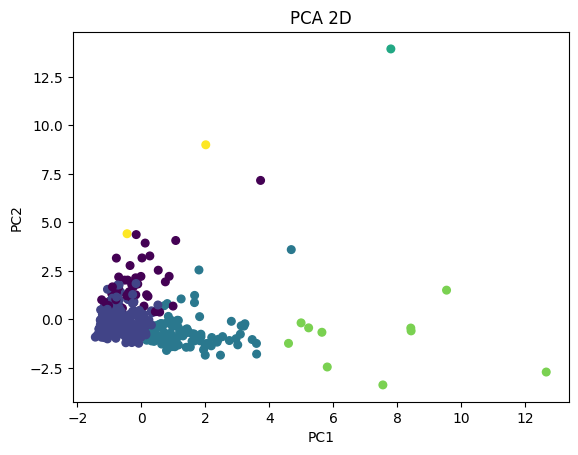

In [72]:
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(scaled_data)

plt.figure()
plt.scatter(x_pca[:,0],x_pca[:,1],c= df["Cluster"], s = 30)
plt.title("PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")

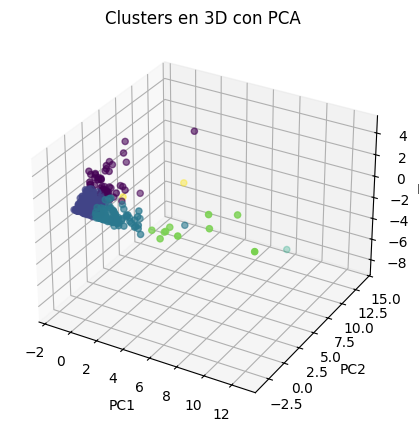

In [74]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (necesario para proyección 3d)
pca3 = PCA(n_components=3, random_state=42)
X_pca3 = pca3.fit_transform(scaled_data)

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=df["Cluster"], s=20)
ax.set_title("Clusters en 3D con PCA")
ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
plt.show()


Boxplots por cluster

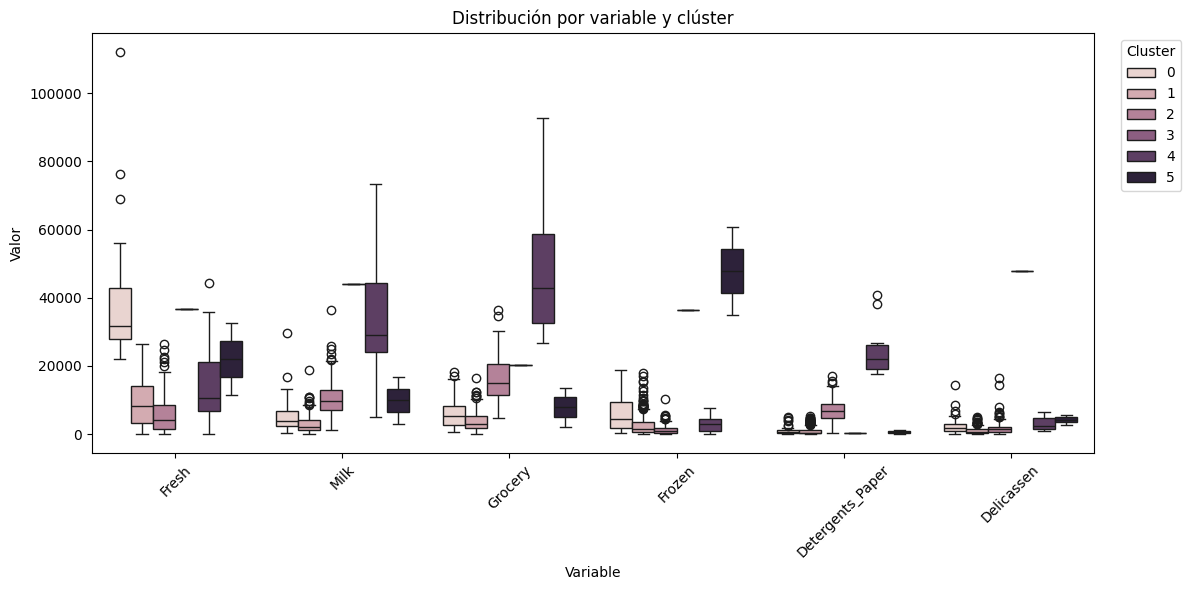

In [77]:


vars_gasto = df.drop(columns=["Channel","Region","Cluster"], errors="ignore").columns
melted = df.melt(id_vars="Cluster", value_vars=vars_gasto, var_name="Variable", value_name="Valor")

plt.figure(figsize=(12,6))
sns.boxplot(data=melted, x="Variable", y="Valor", hue="Cluster")
plt.xticks(rotation=45)
plt.title("Distribución por variable y clúster")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


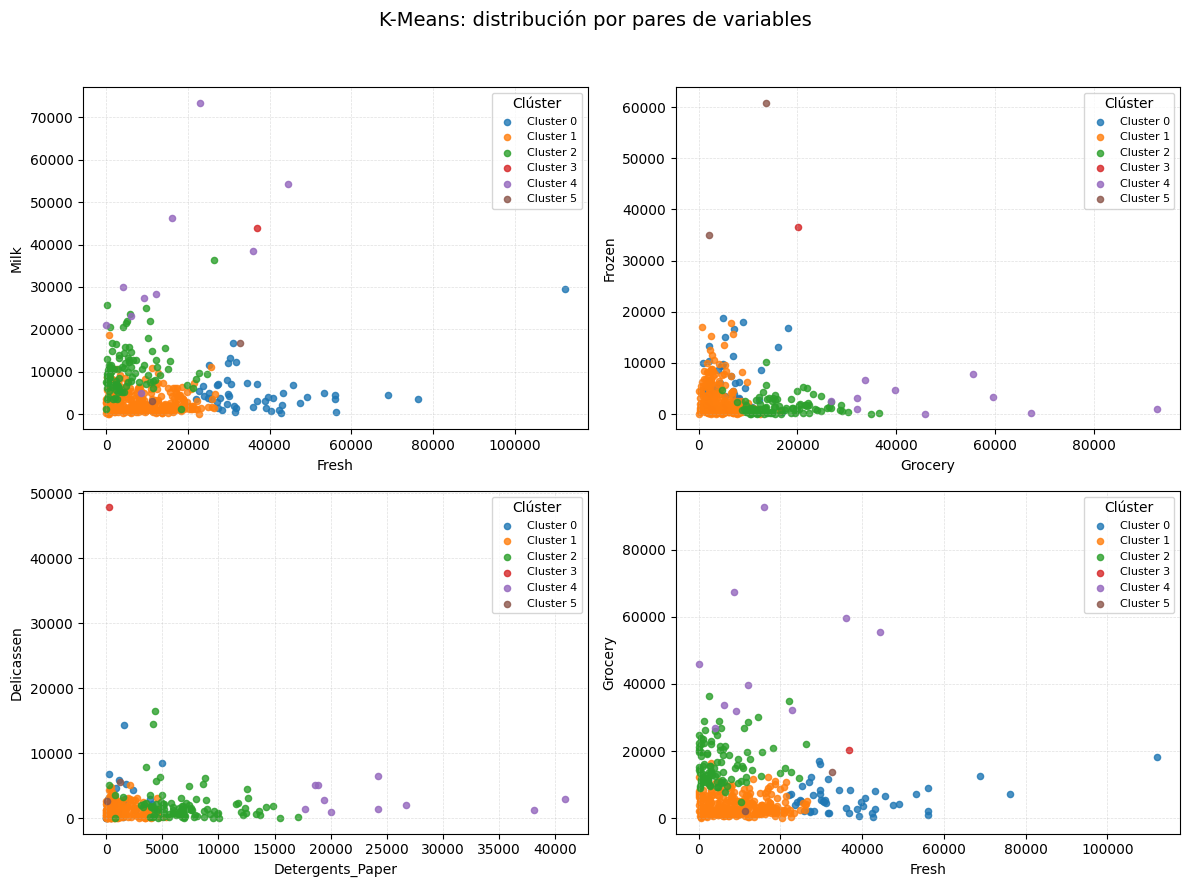

In [79]:

# 1) Etiquetas de clúster
labels = df["Cluster"].values if "Cluster" in df.columns else kmeans.labels_
cluster_ids = np.unique(labels)

# 2) Pares de variables del dataset Wholesale
subplot_configs = [
    ("Fresh", "Milk"),
    ("Grocery", "Frozen"),
    ("Detergents_Paper", "Delicassen"),
    ("Fresh", "Grocery"),
]

# 3) Colores (uno por clúster)
cmap = plt.get_cmap("tab10")
colors = {cid: cmap(i % 10) for i, cid in enumerate(cluster_ids)}

# 4) Subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle("K-Means: distribución por pares de variables", fontsize=14)

for ax, (x_lab, y_lab) in zip(axes.ravel(), subplot_configs):
    for cid in cluster_ids:
        mask = labels == cid
        ax.scatter(df.loc[mask, x_lab], df.loc[mask, y_lab],
                   s=20, alpha=0.8, label=f"Cluster {cid}", c=[colors[cid]])
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.4)
    ax.legend(title="Clúster", fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio al título
plt.show()